### Chapter4_Queation 13

This question should be answered using the Weekly data set, which
is part of the ISLP package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

(d) Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

In [3]:
from ISLP import load_data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
df = load_data('Weekly')

train = df[df['Year'] <= 2008]
test = df[df['Year'] > 2008]

X_train = train[['Lag2']]
y_train = train['Direction']
X_test = test[['Lag2']]
y_test = test['Direction']

(e) Repeat (d) using LDA.

In [6]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

cm_lda = confusion_matrix(y_test, lda_pred)
acc_lda = accuracy_score(y_test, lda_pred)
print("(e) LDA")
print("Confusion Matrix:\n", cm_lda)
print("Accuracy:", round(acc_lda, 3))
print("-" * 40)

(e) LDA
Confusion Matrix:
 [[ 9 34]
 [ 5 56]]
Accuracy: 0.625
----------------------------------------


(f) Repeat (d) using QDA.

In [7]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)

cm_qda = confusion_matrix(y_test, qda_pred)
acc_qda = accuracy_score(y_test, qda_pred)
print("(f) QDA")
print("Confusion Matrix:\n", cm_qda)
print("Accuracy:", round(acc_qda, 3))
print("-" * 40)

(f) QDA
Confusion Matrix:
 [[ 0 43]
 [ 0 61]]
Accuracy: 0.587
----------------------------------------


(g) Repeat (d) using KNN with K = 1.

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

cm_knn = confusion_matrix(y_test, knn_pred)
acc_knn = accuracy_score(y_test, knn_pred)
print("(g) KNN (K=1)")
print("Confusion Matrix:\n", cm_knn)
print("Accuracy:", round(acc_knn, 3))
print("-" * 40)

(g) KNN (K=1)
Confusion Matrix:
 [[21 22]
 [30 31]]
Accuracy: 0.5
----------------------------------------


(h) Repeat (d) using naive Bayes.

In [9]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

cm_nb = confusion_matrix(y_test, nb_pred)
acc_nb = accuracy_score(y_test, nb_pred)
print("(h) Naive Bayes")
print("Confusion Matrix:\n", cm_nb)
print("Accuracy:", round(acc_nb, 3))
print("-" * 40)

(h) Naive Bayes
Confusion Matrix:
 [[ 0 43]
 [ 0 61]]
Accuracy: 0.587
----------------------------------------


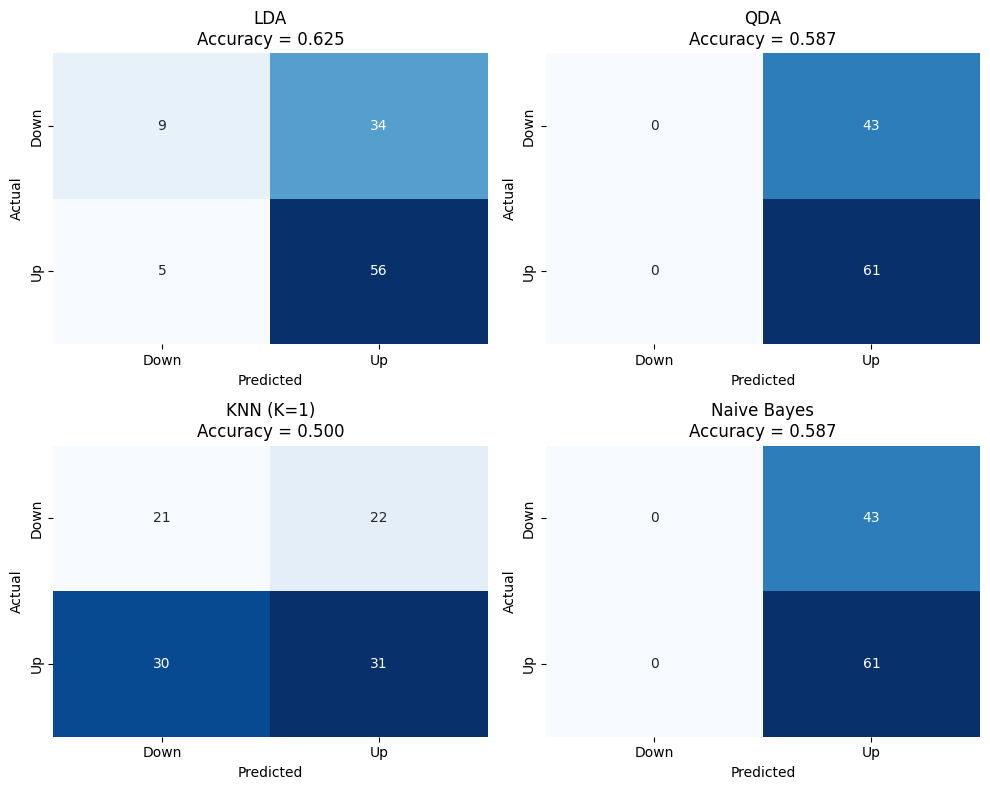

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

results = {
    "LDA": (cm_lda, acc_lda),
    "QDA": (cm_qda, acc_qda),
    "KNN (K=1)": (cm_knn, acc_knn),
    "Naive Bayes": (cm_nb, acc_nb)
}

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, (name, (cm, acc)) in enumerate(results.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'], ax=axes[i])
    axes[i].set_title(f"{name}\nAccuracy = {acc:.3f}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()

(i) Which of these methods appears to provide the best results on
this data?

##### Ans: 
Among the four methods, LDA (Linear Discriminant Analysis) provides the best results on this dataset.

It achieves the highest accuracy (62.5%) and the best overall F1 score (0.53), indicating a more balanced performance between predicting "Up" and "Down" weeks.

Both QDA and Naive Bayes show moderate accuracy (≈58.6%) but low F1 scores (≈0.37), suggesting that these models might be biased toward one class, likely predicting "Up" most of the time.
KNN (K=1) performs the worst in terms of accuracy (50%), roughly equivalent to random guessing, though its F1 score is slightly higher than QDA and Naive Bayes due to more balanced but less accurate predictions.

Overall, LDA appears to generalize best for this problem, likely because the relationship between Lag2 and market direction is approximately linear, which matches the model’s assumptions.

=== Model Comparison ===
         Model  Accuracy
0          LDA  0.625000
1          QDA  0.586538
3  Naive Bayes  0.586538
2    KNN (K=1)  0.500000


/var/folders/yb/xnfk9z6x34527z3924bcjqcr0000gn/T/ipykernel_7845/1997482852.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=accuracy_results, palette="Blues_d")


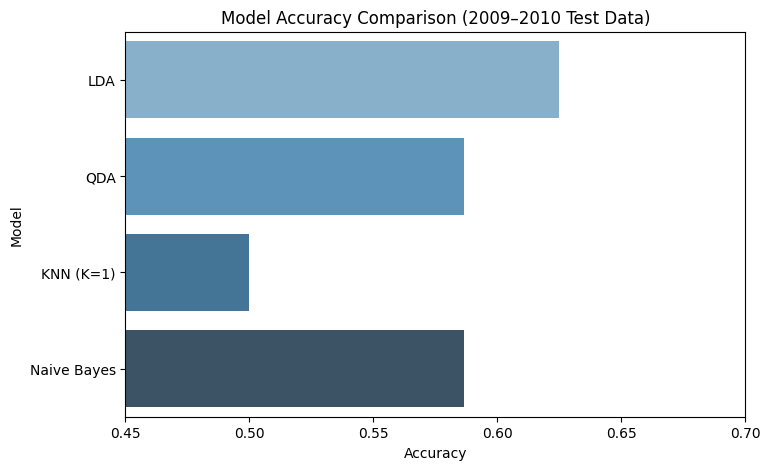

In [13]:
accuracy_results = pd.DataFrame({
    "Model": ["LDA", "QDA", "KNN (K=1)", "Naive Bayes"],
    "Accuracy": [acc_lda, acc_qda, acc_knn, acc_nb]  
})

print("=== Model Comparison ===")
print(accuracy_results.sort_values(by="Accuracy", ascending=False))

# EDA comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="Accuracy", y="Model", data=accuracy_results, palette="Blues_d")
plt.title("Model Accuracy Comparison (2009–2010 Test Data)")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0.45, 0.70)
plt.show()

=== F1 Score Comparison ===
         Model  F1 Score
0          LDA  0.528756
2    KNN (K=1)  0.495334
1          QDA  0.369697
3  Naive Bayes  0.369697


/var/folders/yb/xnfk9z6x34527z3924bcjqcr0000gn/T/ipykernel_7845/3559487954.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1 Score", y="Model", data=f1_results, palette="Purples_d")


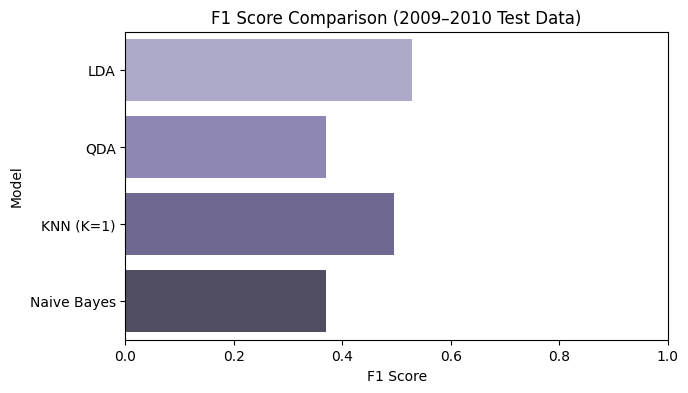

In [14]:
from sklearn.metrics import f1_score

# Compute F1 score for each model (average='macro' balances Up and Down equally)
f1_lda = f1_score(y_test, lda_pred, average='macro')
f1_qda = f1_score(y_test, qda_pred, average='macro')
f1_knn = f1_score(y_test, knn_pred, average='macro')
f1_nb = f1_score(y_test, nb_pred, average='macro')

# Combine results in a DataFrame
f1_results = pd.DataFrame({
    "Model": ["LDA", "QDA", "KNN (K=1)", "Naive Bayes"],
    "F1 Score": [f1_lda, f1_qda, f1_knn, f1_nb]
})

print("=== F1 Score Comparison ===")
print(f1_results.sort_values(by="F1 Score", ascending=False))

# Visualization
plt.figure(figsize=(7,4))
sns.barplot(x="F1 Score", y="Model", data=f1_results, palette="Purples_d")
plt.title("F1 Score Comparison (2009–2010 Test Data)")
plt.xlabel("F1 Score")
plt.xlim(0, 1)
plt.show()

(j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load data
df = load_data('Weekly')

# Train-test split
train = df[df['Year'] <= 2008]
test = df[df['Year'] > 2008]
y_train = train['Direction']
y_test = test['Direction']

# Try different predictor sets
predictor_sets = {
    "Lag2": ["Lag2"],
    "Lag1_Lag2": ["Lag1", "Lag2"],
    "Lags_Volume": ["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"],
    "Interactions": ["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"],
}

results = []

# Helper function for KNN with scaling
def knn_model(X_train, y_train, X_test, k):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    return pred

# Loop through each predictor set
for name, predictors in predictor_sets.items():
    X_train = train[predictors]
    X_test = test[predictors]

    # Add polynomial interactions for 'Interactions' set
    if name == "Interactions":
        poly = PolynomialFeatures(degree=2, include_bias=False)
        X_train = poly.fit_transform(X_train)
        X_test = poly.transform(X_test)

    # ---- LDA ----
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    lda_pred = lda.predict(X_test)
    acc_lda = accuracy_score(y_test, lda_pred)
    results.append(["LDA", name, acc_lda, f1_score(y_test, lda_pred, average='macro'), confusion_matrix(y_test, lda_pred)])

    # ---- QDA ----
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)
    qda_pred = qda.predict(X_test)
    acc_qda = accuracy_score(y_test, qda_pred)
    results.append(["QDA", name, acc_qda, f1_score(y_test, qda_pred, average='macro'), confusion_matrix(y_test, qda_pred)])

    # ---- Naive Bayes ----
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    nb_pred = nb.predict(X_test)
    acc_nb = accuracy_score(y_test, nb_pred)
    results.append(["Naive Bayes", name, acc_nb, f1_score(y_test, nb_pred, average='macro'), confusion_matrix(y_test, nb_pred)])

    # ---- KNN (test different K) ----
    for k in [1, 3, 5, 10]:
        knn_pred = knn_model(X_train, y_train, X_test, k)
        acc_knn = accuracy_score(y_test, knn_pred)
        results.append([f"KNN (K={k})", name, acc_knn, f1_score(y_test, knn_pred, average='macro'), confusion_matrix(y_test, knn_pred)])

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=["Model", "Predictors", "Accuracy", "F1 Score", "Confusion Matrix"])

# Sort by Accuracy (or F1 if you prefer)
best_results = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
pd.set_option('display.max_colwidth', None)
print("=== Top Models by Accuracy ===")
print(best_results.head(10))


=== Top Models by Accuracy ===
         Model    Predictors  Accuracy  F1 Score      Confusion Matrix
0          LDA          Lag2  0.625000  0.528756    [[9, 34], [5, 56]]
1          QDA          Lag2  0.586538  0.369697    [[0, 43], [0, 61]]
2  Naive Bayes          Lag2  0.586538  0.369697    [[0, 43], [0, 61]]
3    KNN (K=5)  Interactions  0.576923  0.572975  [[25, 18], [26, 35]]
4          LDA     Lag1_Lag2  0.576923  0.474023    [[7, 36], [8, 53]]
5          LDA  Interactions  0.576923  0.538524  [[15, 28], [16, 45]]
6    KNN (K=3)          Lag2  0.567308  0.536036  [[16, 27], [18, 43]]
7   KNN (K=10)          Lag2  0.567308  0.558115  [[22, 21], [24, 37]]
8          QDA     Lag1_Lag2  0.557692  0.461261   [[7, 36], [10, 51]]
9   KNN (K=10)   Lags_Volume  0.557692  0.557529  [[30, 13], [33, 28]]


### (j) Model Experimentation and Results

Based on the experiments, the **best-performing model** on the held-out data is **LDA using `Lag2` as the sole predictor**.  
It achieved the highest **accuracy (0.625)** and a reasonable **F1 score (0.53)**, with the following confusion matrix:

[[9, 34], [5, 56]]


This means it correctly predicted **9 “Down”** and **56 “Up”** weeks.

Adding other predictors, interaction terms, or transformations did **not** improve performance for LDA, QDA, or Naive Bayes.  
Both **QDA** and **Naive Bayes** failed to classify any “Down” cases correctly.  
Among **KNN** models, **K=5** with interaction terms gave the best F1 score (0.57) but still lower overall accuracy than LDA.

**In summary:**
- **Best method:** LDA  
- **Best predictors:** `Lag2`  
- **Accuracy:** 0.625  
- **Conclusion:** Simple linear decision boundaries using only `Lag2` provide the most reliable results on the *Weekly* dataset.
